In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

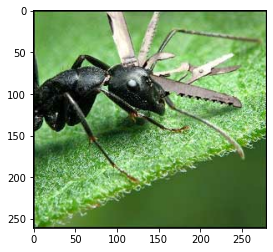

In [2]:
img_path = './datasets/ants/swiss-army-ant.jpg'
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_jpeg(img_raw)
plt.imshow(img)

In [3]:
img.shape

TensorShape([261, 280, 3])

In [4]:
flatten_img = np.array(img.numpy()).flatten().tolist()

In [8]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

In [6]:
example_with_image = Example(
    features=Features(
        feature={
            "image": Feature(int64_list=Int64List(value=flatten_img))
        }
    )
)

In [7]:
serialized_example = example_with_image.SerializeToString()

In [8]:
feature_description = { 
    "image": tf.io.VarLenFeature('int64')
}

In [9]:
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)

In [10]:
print(example_with_image["image"])

SparseTensor(indices=tf.Tensor(
[[     0]
 [     1]
 [     2]
 ...
 [219237]
 [219238]
 [219239]], shape=(219240, 1), dtype=int64), values=tf.Tensor([34  5 61 ...  0  0  0], shape=(219240,), dtype=int64), dense_shape=tf.Tensor([219240], shape=(1,), dtype=int64))


In [11]:
print(example_with_image["image"].values.numpy())
decoded_img = example_with_image["image"].values.numpy().reshape([261, 280, 3])

[34  5 61 ...  0  0  0]


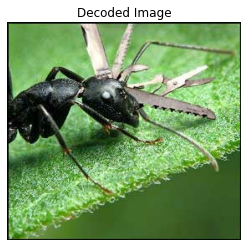

In [12]:
plt.imshow(decoded_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()

In [13]:
with tf.io.TFRecordWriter("my_ants.tfrecord") as f:
    f.write(serialized_example)

In [14]:
for x in tf.data.TFRecordDataset(["my_ants.tfrecord"]):
    parsed_example = tf.io.parse_single_example(x,
                                                feature_description)

In [15]:
de_img = parsed_example["image"].values.numpy().reshape([261, 280, 3])

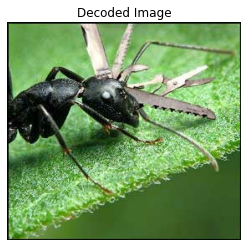

In [16]:
plt.imshow(de_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### cifar10 datasets

In [9]:
import pickle
import os

CIFAR10_BATCH = 10000
CIFAR10_HEIGHT = 32
CIFAR10_WIDTH = 32
CIFAR10_CHANNELS = 3
CIFAR10_CLASSES = 10

cifar10_path = './datasets/cifar10-py/data_batch_1'

In [10]:
with open(cifar10_path, mode='rb') as f:
    data = pickle.load(f, encoding='bytes')

In [11]:
raw_img = data[b'data']
class_index = np.array(data[b'labels'])

In [12]:
print(raw_img)
print(raw_img.shape)
# 10000 x 3072 = 30720000

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]]
(10000, 3072)


(10000, 32, 32, 3)


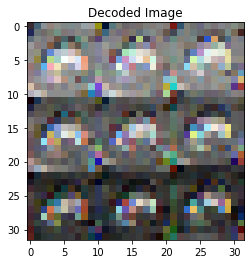

In [13]:
re_img = raw_img.reshape([-1, CIFAR10_HEIGHT, CIFAR10_WIDTH, CIFAR10_CHANNELS])
print(re_img.shape)
plt.imshow(re_img[0])
plt.title("Decoded Image")
plt.show()

In [31]:
with tf.io.TFRecordWriter("cifar10.tfrecord") as f:
    for i in range(CIFAR10_BATCH):
        image = Example(
            features=Features(
                feature={
                    "image": Feature(int64_list=Int64List(value=raw_img[i])),
                    "label": Feature(int64_list=Int64List(value=[class_index[i]]))
                }
            )
        )
    
        f.write(image.SerializeToString())

In [32]:
desc = { 
    "image": tf.io.VarLenFeature('int64'),
    "label": tf.io.FixedLenFeature([], 'int64')
}

In [45]:
def preprocess(tfrecord):
    feature_descriptions = {
        "image": tf.io.FixedLenFeature([], tf.string, default_value=""),
        "label": tf.io.FixedLenFeature([], tf.int64, default_value=-1)
    }
    example = tf.io.parse_single_example(tfrecord, desc)
    image = example["image"].values
    image = tf.reshape(image, shape=[32, 32, 3])
    return image, example["label"]

def cifa10_dataset(filepaths, n_read_threads=5, shuffle_buffer_size=None,
                  n_parse_threads=5, batch_size=32, cache=True):
    dataset = tf.data.TFRecordDataset(filepaths,
                                      num_parallel_reads=n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [46]:
train_set = cifar10_dataset(["cifar10.tfrecord"], shuffle_buffer_size=60000)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(32, 32, 3)


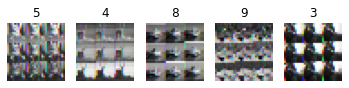

In [47]:
for X, y in train_set.take(1):
    print(X[1].shape)
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X[i].numpy())
        plt.axis("off")
        plt.title(str(y[i].numpy()))

In [48]:
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[CIFAR10_HEIGHT, CIFAR10_WIDTH, CIFAR10_CHANNELS]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               921900    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_set, epochs=30)

Epoch 1/30
313/313 [==============================] - 1s 4ms/step - loss: 634210607687532544.0000 - accuracy: 0.0945
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 2.4149 - accuracy: 0.1022
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3030 - accuracy: 0.1025
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1013
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1019
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1016
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3024 - accuracy: 0.1003
Epoch 8/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3024 - accuracy: 0.1031
Epoch 9/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3023 - accuracy: 0.0990
Epoch 10/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3023 -

NameError: name 'save_fig' is not defined

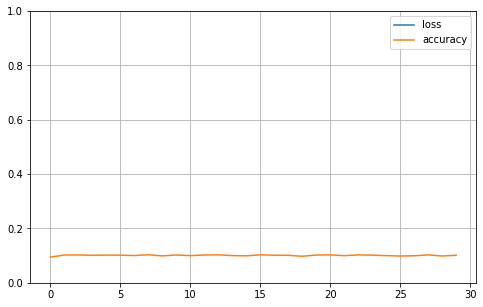

In [51]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()